In [6]:
# Practice dataset as a part of curriculam at Great Learning

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,accuracy_score

In [11]:
data=pd.read_csv('diabetes.csv')

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

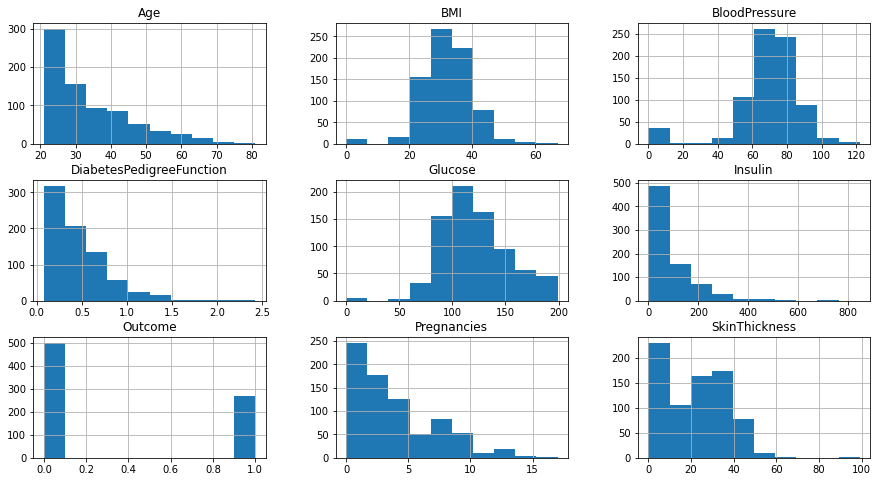

In [18]:
data.hist(figsize=(15,8))
plt.show()

In [20]:
correlation_metrics=data.corr()
print(correlation_metrics)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

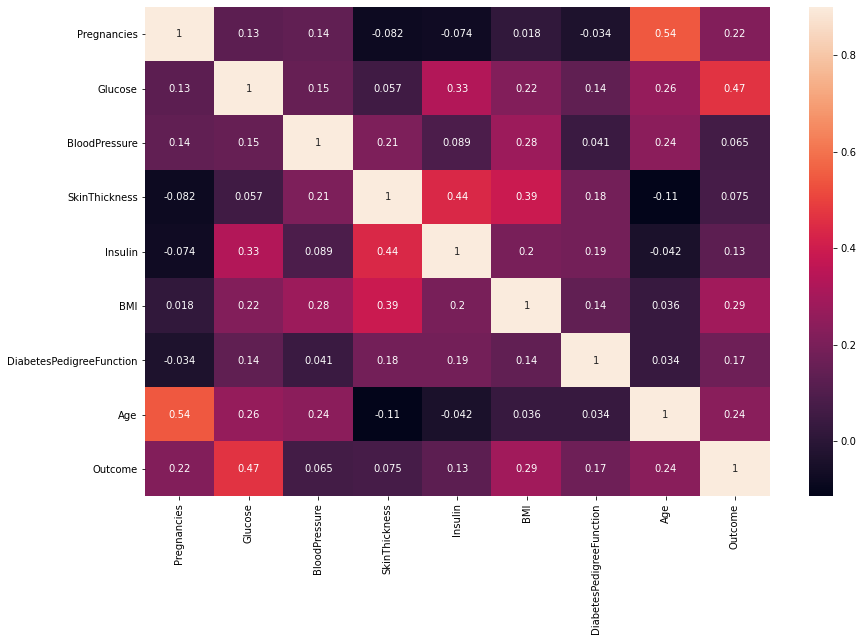

In [23]:
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,vmax=0.9,annot=True)
plt.show()

In [29]:
data.shape

(768, 9)

In [38]:
data['Outcome'].head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Non diabetes Vs Diabetes')

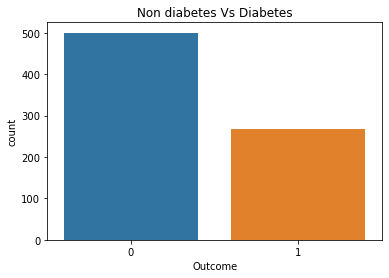

In [40]:
sns.countplot(x=data.Outcome)
plt.title("Non diabetes Vs Diabetes")

In [43]:
No_sugar=0
result=data['Outcome']
for i in range(len(result)):
    #print()
    if result[i]==0:
        No_sugar=No_sugar+1
print(No_sugar)

500


In [45]:
Sugar=0
result=data['Outcome']
for i in range(len(result)):
    #print()
    if result[i]==1:
        Sugar=Sugar+1
print(Sugar)

268


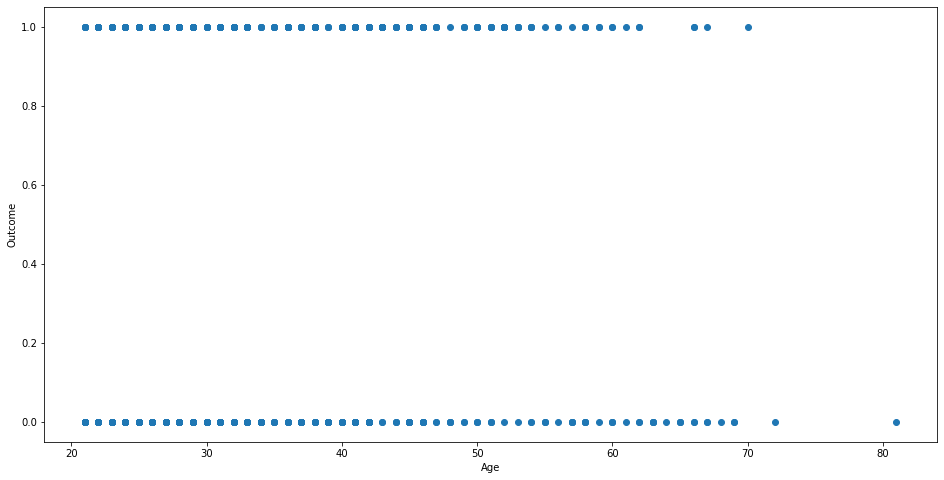

In [46]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(data['Age'],data['Outcome'])
ax.set_xlabel('Age')
ax.set_ylabel('Outcome')
plt.show()

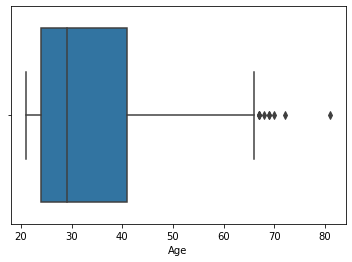

In [49]:
sns.boxplot(data['Age'])

In [52]:
age_sort=np.sort(data["Age"])

In [54]:
age_sort.max(),age_sort.min()

(81, 21)

In [57]:
Q1=np.percentile(data["Age"],25,interpolation='midpoint')
Q2=np.percentile(data["Age"],50,interpolation='midpoint')
Q3=np.percentile(data["Age"],75,interpolation='midpoint')
IQR=Q3-Q1
print("Interquartile range is :",IQR)

Interquartile range is : 17.0


In [58]:
data["Age"].mean()

33.240885416666664

In [63]:
from scipy.stats import ttest_1samp

In [65]:
#Hypothesis says that mean age for pregnency is 33
tset,pval=ttest_1samp(data['Age'],33)
print(pval)

0.5704435509787772


In [66]:
if pval<0.05:
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are accepting null hypothesis


In [67]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
lr=LogisticRegression()

In [69]:
lr.fit(x_train,y_train)

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_predict=lr.predict(x_test)

In [74]:
cm=metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[83 16]
 [21 34]]


In [75]:
accuracy=lr.score(x_test,y_test)
print("The model provides an accuracy of :", accuracy*100,'%')

The model provides an accuracy of : 75.97402597402598 %
